In [1]:
import numpy as np 
import pandas as pd 
import plotly.express as px 
import missingno as msno 
import os

df = pd.read_csv("/Users/anish/Downloads/nbaplayersdraft.csv")
df.head()
df.shape
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1922 entries, 0 to 1921
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         1922 non-null   int64  
 1   year                       1922 non-null   int64  
 2   rank                       1922 non-null   int64  
 3   overall_pick               1922 non-null   int64  
 4   team                       1922 non-null   object 
 5   player                     1922 non-null   object 
 6   college                    1585 non-null   object 
 7   years_active               1669 non-null   float64
 8   games                      1669 non-null   float64
 9   minutes_played             1669 non-null   float64
 10  points                     1669 non-null   float64
 11  total_rebounds             1669 non-null   float64
 12  assists                    1669 non-null   float64
 13  field_goal_percentage      1665 non-null   float

In [2]:
# Filling numerical columns with their median values
numerical_cols = df.select_dtypes(include=['float64']).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())

# Handling missing values in 'college' (categorical column)
# Filling missing values with a placeholder value 'Unknown'
df['college'] = df['college'].fillna('Unknown')

# Rechecking for missing values
missing_values_updated = df.isnull().sum()

missing_values_updated


id                           0
year                         0
rank                         0
overall_pick                 0
team                         0
player                       0
college                      0
years_active                 0
games                        0
minutes_played               0
points                       0
total_rebounds               0
assists                      0
field_goal_percentage        0
3_point_percentage           0
free_throw_percentage        0
average_minutes_played       0
points_per_game              0
average_total_rebounds       0
average_assists              0
win_shares                   0
win_shares_per_48_minutes    0
box_plus_minus               0
value_over_replacement       0
dtype: int64

In [3]:
# Saving the cleaned dataset to a new CSV file
cleaned_file_path = '/Users/anish/Downloads/cleaned_nbaplayersdraft.csv'
df.to_csv(cleaned_file_path, index=False)

cleaned_file_path


'/Users/anish/Downloads/cleaned_nbaplayersdraft.csv'

In [4]:
# Load the cleaned data for analysis
cleaned_df = pd.read_csv(cleaned_file_path)

# Initial insights from the data can include:
# 1. Descriptive statistics for numerical columns
# 2. Distribution of players across teams
# 3. Trends over years in drafting
# 4. Top colleges for NBA players

# 1. Descriptive Statistics
descriptive_stats = cleaned_df.describe()

# 2. Distribution of players across teams
team_distribution = cleaned_df['team'].value_counts()

# 3. Trends over years in drafting
year_trends = cleaned_df['year'].value_counts().sort_index()

# 4. Top colleges for NBA players
top_colleges = cleaned_df['college'].value_counts().head(10)

descriptive_stats, team_distribution.head(), year_trends.head(), top_colleges.head()


(                id         year         rank  overall_pick  years_active  \
 count  1922.000000  1922.000000  1922.000000   1922.000000   1922.000000   
 mean    961.500000  2005.317378    29.694589     29.694589      6.157128   
 std     554.977927     9.456946    16.912454     16.912454      4.362215   
 min       1.000000  1989.000000     1.000000      1.000000      1.000000   
 25%     481.250000  1997.000000    15.000000     15.000000      3.000000   
 50%     961.500000  2005.000000    30.000000     30.000000      5.000000   
 75%    1441.750000  2013.000000    44.000000     44.000000      9.000000   
 max    1922.000000  2021.000000    60.000000     60.000000     22.000000   
 
              games  minutes_played        points  total_rebounds  \
 count  1922.000000     1922.000000   1922.000000     1922.000000   
 mean    333.162331     7846.844953   3313.405827     1386.304370   
 std     305.151740     9283.667397   4549.136760     1888.623034   
 min       1.000000        0.

/var/folders/0x/_znzpj8s059d6xw0vrsd7nwr0000gn/T/ipykernel_42955/1321508674.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='year', data=cleaned_df, palette='viridis')
/var/folders/0x/_znzpj8s059d6xw0vrsd7nwr0000gn/T/ipykernel_42955/1321508674.py:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='year', y='points_per_game', data=cleaned_df, estimator='mean', ci=None, marker='o', color='b')


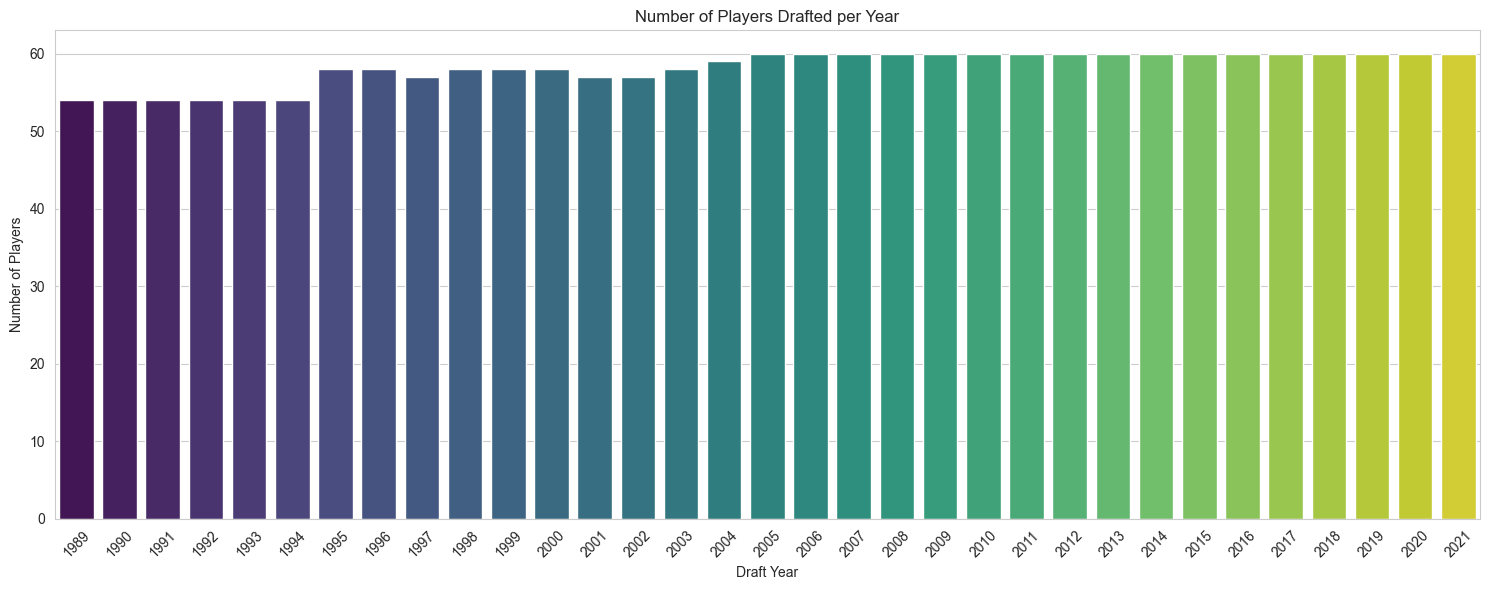

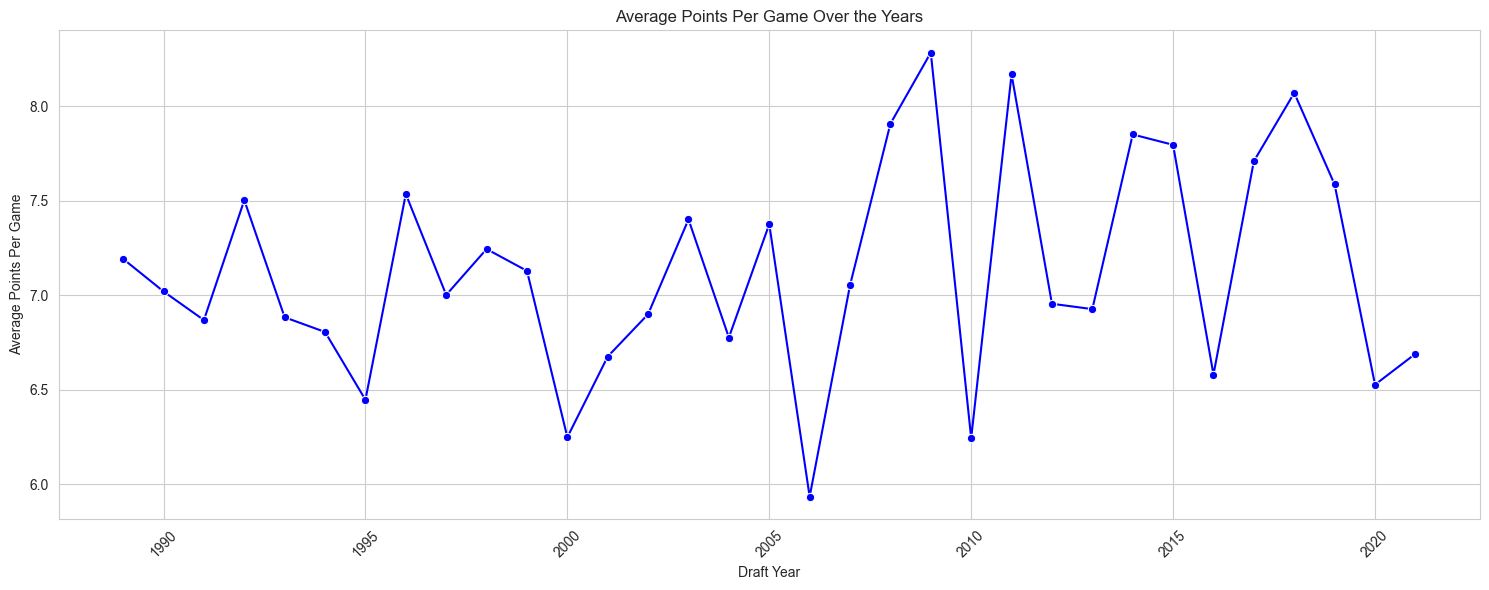

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetic style of the plots
sns.set_style("whitegrid")

# Trend Analysis
# 1. Draft Year Trends
plt.figure(figsize=(15, 6))
sns.countplot(x='year', data=cleaned_df, palette='viridis')
plt.title('Number of Players Drafted per Year')
plt.xticks(rotation=45)
plt.xlabel('Draft Year')
plt.ylabel('Number of Players')
plt.tight_layout()

# 2. Performance Over Time (e.g., Points Per Game)
plt.figure(figsize=(15, 6))
sns.lineplot(x='year', y='points_per_game', data=cleaned_df, estimator='mean', ci=None, marker='o', color='b')
plt.title('Average Points Per Game Over the Years')
plt.xlabel('Draft Year')
plt.ylabel('Average Points Per Game')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


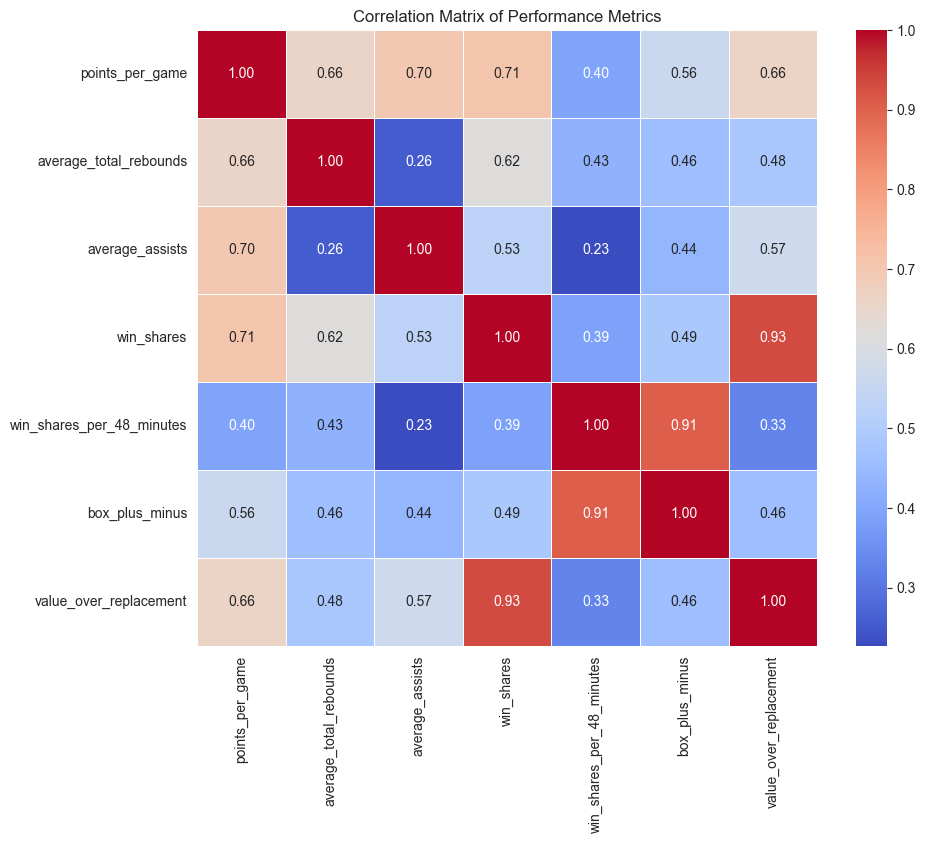

(               player  points_per_game
 1023     Kevin Durant             27.2
 785      LeBron James             27.1
 382     Allen Iverson             26.7
 1684      Luka Dončić             26.4
 1444      Joel Embiid             26.0
 1742  Zion Williamson             25.7
 1686       Trae Young             25.3
 394       Kobe Bryant             25.0
 1144     James Harden             24.9
 1327   Damian Lillard             24.6,
                 player  win_shares
 785       LeBron James       249.5
 440         Tim Duncan       206.4
 505      Dirk Nowitzki       206.3
 905         Chris Paul       198.9
 328      Kevin Garnett       191.4
 162   Shaquille O'Neal       181.7
 394        Kobe Bryant       172.7
 1023      Kevin Durant       155.2
 506        Paul Pierce       150.0
 1144      James Harden       149.6)

In [7]:
# Player Performance Analysis

# 1. Correlation Matrix of Performance Metrics
performance_metrics = ['points_per_game', 'average_total_rebounds', 'average_assists', 
                       'win_shares', 'win_shares_per_48_minutes', 'box_plus_minus', 'value_over_replacement']

# Compute the correlation matrix
corr = cleaned_df[performance_metrics].corr()

# Heatmap for correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=.5, fmt=".2f")
plt.title('Correlation Matrix of Performance Metrics')
plt.show()

# 2. Identifying Top Performers in Key Metrics
# Top 10 players based on points per game
top_scorers = cleaned_df.nlargest(10, 'points_per_game')[['player', 'points_per_game']]

# Top 10 players based on win shares
top_win_shares = cleaned_df.nlargest(10, 'win_shares')[['player', 'win_shares']]

top_scorers, top_win_shares


In [11]:


from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np


ModuleNotFoundError: No module named 'sklearn'

In [12]:
!pip install sklearn.cluster

Defaulting to user installation because normal site-packages is not writeable
ERROR: Could not find a version that satisfies the requirement sklearn.cluster (from versions: none)
ERROR: No matching distribution found for sklearn.cluster


In [13]:
import numpy as np

In [14]:
from sklearn.cluster import Kmeans

ModuleNotFoundError: No module named 'sklearn'

In [16]:
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
     - 11.2 kB 23.8 MB/s 0:00:00
     - 5.4 kB ? 0:00:00
     - 10.0 kB ? 0:00:000m
   \ 10.2 MB 23.0 MB/s 0:00:00
   - 302.2 kB 35.3 MB/s 0:00:00
   - 15.5 kB 84.0 MB/s 0:00:00


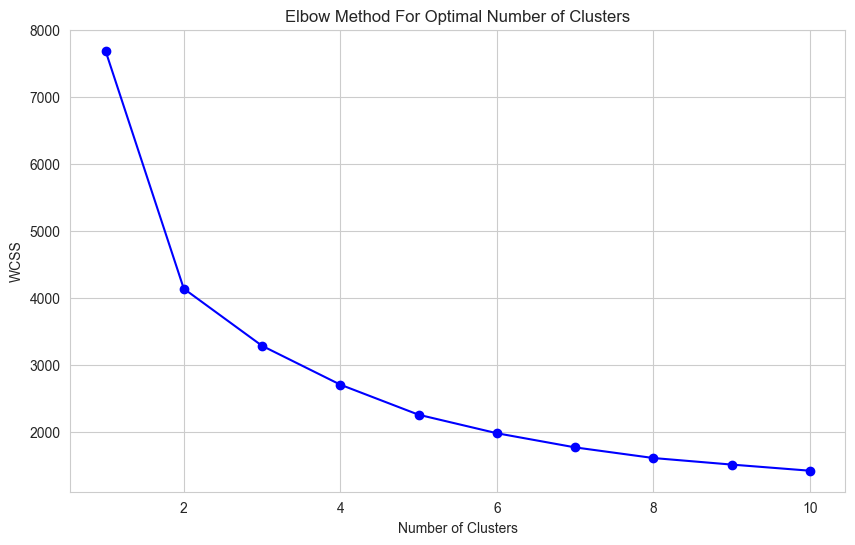

In [18]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np

# Selecting features for cluster analysis
features = ['points_per_game', 'average_total_rebounds', 'average_assists', 'win_shares']
X = cleaned_df[features]

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determining the optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plotting the results of the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-', color='b')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


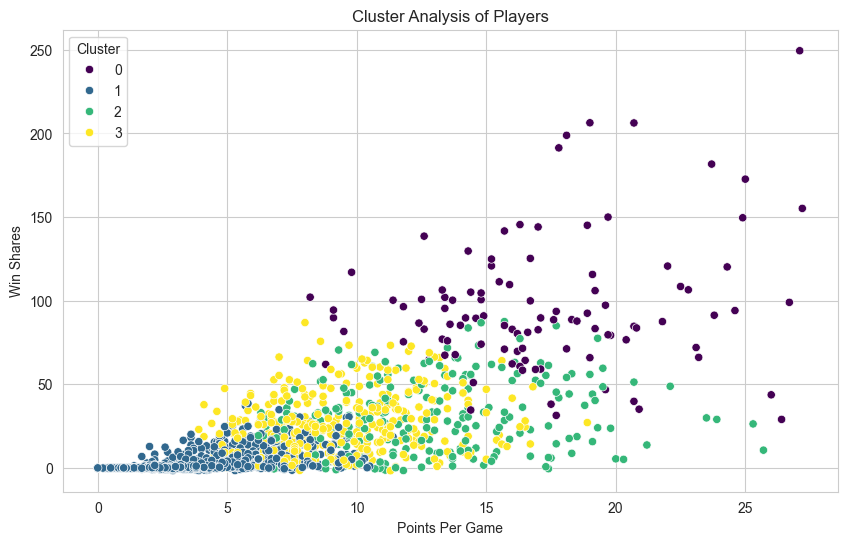

,points_per_game,average_total_rebounds,average_assists,win_shares
Cluster,,,,
0,17.216667,7.129412,3.406863,96.644118
1,4.597656,2.163622,0.913258,3.822959
2,12.708547,3.314957,4.021795,30.399573
3,9.440115,5.330946,1.284241,27.140115


In [19]:
# Simplified Cluster Analysis
# For simplicity, let's choose a reasonable number of clusters, say 4, representing different player types.

# K-Means clustering with 4 clusters
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster_labels = kmeans.fit_predict(X_scaled)

# Adding cluster labels to the original dataframe
cleaned_df['Cluster'] = cluster_labels

# Analyzing the clusters
cluster_analysis = cleaned_df.groupby('Cluster')[features].mean()

# Visualizing the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='points_per_game', y='win_shares', hue='Cluster', data=cleaned_df, palette='viridis')
plt.title('Cluster Analysis of Players')
plt.xlabel('Points Per Game')
plt.ylabel('Win Shares')
plt.show()

cluster_analysis


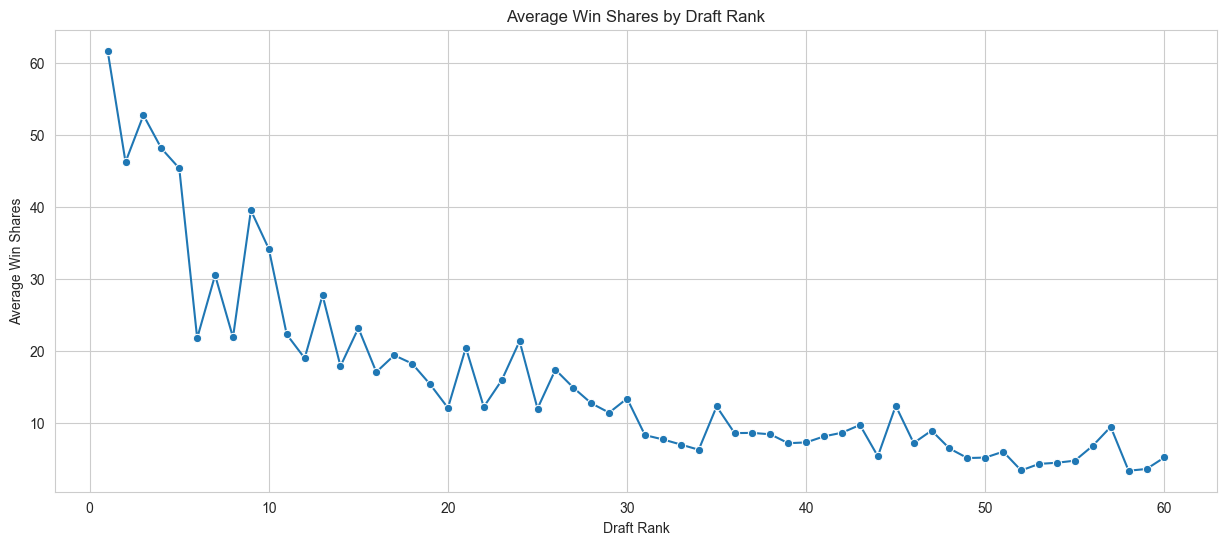

(34.13696969696969, 5.622551252847381)

In [20]:
# Draft Analysis

# Success Rate of Draft Picks
# Defining a success metric - for simplicity, we'll use 'win shares' as a proxy for success.
# The higher the win shares, the more successful the draft pick.
# We'll look at the average win shares by draft rank.

# Average win shares by draft rank
average_win_shares_by_rank = cleaned_df.groupby('rank')['win_shares'].mean()

# Comparison of Early vs. Late Draft Picks
# Early picks are generally the first 15 picks, and late picks could be considered as picks 46 to 60.
early_picks_win_shares = cleaned_df[cleaned_df['rank'] <= 15]['win_shares'].mean()
late_picks_win_shares = cleaned_df[cleaned_df['rank'] >= 46]['win_shares'].mean()

# Plotting
plt.figure(figsize=(15, 6))
sns.lineplot(data=average_win_shares_by_rank, marker='o')
plt.title('Average Win Shares by Draft Rank')
plt.xlabel('Draft Rank')
plt.ylabel('Average Win Shares')
plt.show()

early_picks_win_shares, late_picks_win_shares
